<a href="https://colab.research.google.com/github/dulcioris/dulcioris/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Metodo de Euler ***

**Objetivo:**
Aplicar el método de Euler para resolver ecuaciones diferenciales ordinarias (EDO) de primer orden, y analizar los errores de truncación, redondeo y absoluto asociados al método.

**Introducción**: El método de Euler es un método numérico sencillo para aproximar soluciones de ecuaciones diferenciales ordinarias de primer orden. Dado un problema inicial:

$\frac{dy}{dt}= f(t,y)\hspace{1cm}$            $ y(t_0)=y_0$  

El método de Euler aproxima la solución en un intervalo $[t_o,t_f]$ utilizando la fórmula:

$$y_{n+1}= y_n + hf(t_n,y_n)$$

Donde:


*  *** h*** es el tamaño del paso (la distancia entre puntos sucesivos en el eje x, la cual es homogonea)




Consideremos la EDO: $\frac{dy}{dx}= -2y\hspace{1cm}$            $ y(0)=1$

Resuelve la EDO usando el método de Euler con un paso h= 0.1 desde $t_0=0$ hasta $t_f=1$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y) para la EDO
def f(x, y):
    return -2 * y

# Solución exacta de la EDO para comparación. Debido a que la ecuación es
# sencilla de resolver de manera analítica, podemos graficar la solución exacta
# para compararla con nuestra solución aproximada.
def solucion(x):
    return np.exp(-2 * x)

# Método de Euler: Definimos nuestro método de euler
def euler(f, x0, y0, h, xf):
    n = int((xf - x0) / h)
    x= np.linspace(x0, xf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])

    return x, y

# Parámetros del problema
x0 = 0
y0 = 1
xf = 1







Ejercicio 1: Resuelve la EDO del ejemplo anterior con $h=0.1, 0.01, 0.001$. Ademas de calcular el error de truncamiento global para cada punto $x_n$

Tamaño de paso h = 0.1
Error de truncamiento global: 2.79611e-02
Tamaño de paso h = 0.01
Error de truncamiento global: 2.71573e-03
Tamaño de paso h = 0.001
Error de truncamiento global: 2.70761e-04
Tamaño de paso h = 0.0001
Error de truncamiento global: 2.70680e-05


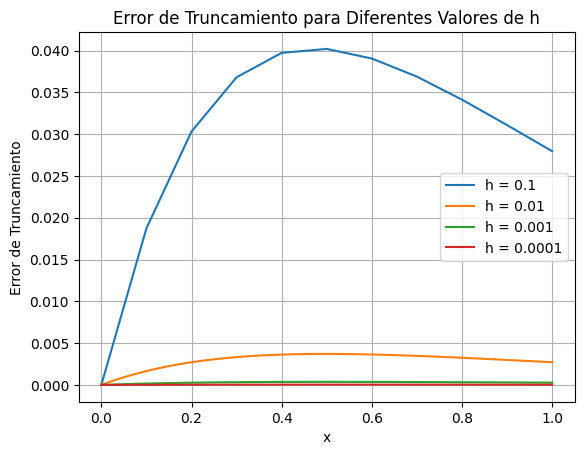

In [6]:
# Ejercicio 1: Cálculo del Error de Truncamiento
# Diferentes tamaños de paso h a utilizar
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_trun = np.abs(y_exacta - y_approximada)

    print(f"Tamaño de paso h = {h}")
    print(f"Error de truncamiento global: {Error_trun[-1]:.5e}")
    plt.plot(x, Error_trun, label=f'h = {h}')


plt.title("Error de Truncamiento para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error de Truncamiento")
plt.legend()
plt.grid(True)
plt.show()





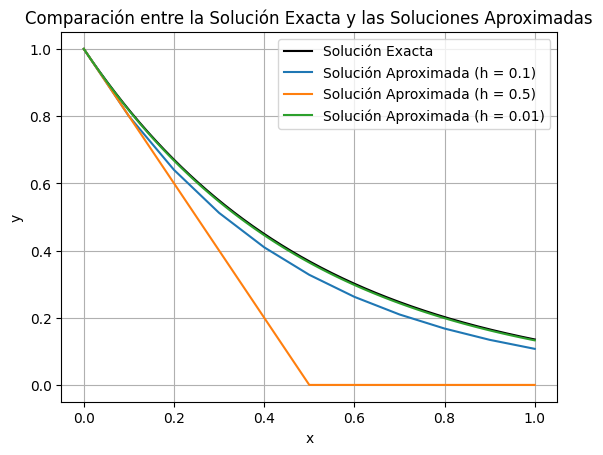

In [8]:
h = [0.1, 0.5, 0.01]

# Generación de la solución exacta para comparación
x = np.linspace(x0, xf, 1000)
y_exacta = solucion(x)

# Graficar la solución exacta
plt.plot(x, y_exacta, 'k-', label='Solución Exacta')

# Generar y graficar las soluciones aproximadas para cada h
for i in h:
    x, y_approximada = euler(f, x0, y0, i, xf)
    plt.plot(x, y_approximada, label=f'Solución Aproximada (h = {i})')

# Configurar y mostrar la gráfica
plt.title("Comparación entre la Solución Exacta y las Soluciones Aproximadas")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 2:

In [9]:
# Ejercicio 2: Análisis del Error de Redondeo
# Implementación con diferentes precisiones
import decimal

def euler_precision(f, x0, y0, h, xf, precision):
    decimal.getcontext().prec = precision
    h = decimal.Decimal(h)
    x = decimal.Decimal(x0)
    y = decimal.Decimal(y0)
    n_steps = int((xf - x0) / float(h))

    y_values = [y0]
    for _ in range(n_steps):
        y = y + h * decimal.Decimal(f(float(x), float(y)))
        x = x + h
        y_values.append(float(y))

    return np.linspace(x0, xf, n_steps + 1), np.array(y_values)

precisions = [10, 15, 20]  # Precisión en dígitos decimales
h = 0.001
for precision in precisions:
    x, y_approximada = euler_precision(f, x0, y0, h, xf, precision)
    y_exacta = solucion(x)
    Error_redondeo = np.abs(y_exacta[-1] - y_approximada[-1])

    print(f"Precisión numérica: {precision} dígitos")
    print(f"Error de redondeo en y(1): {Error_redondeo:.5e}")



Precisión numérica: 10 dígitos
Error de redondeo en y(1): 2.70761e-04
Precisión numérica: 15 dígitos
Error de redondeo en y(1): 2.70761e-04
Precisión numérica: 20 dígitos
Error de redondeo en y(1): 2.70761e-04


Ejercicio 3:

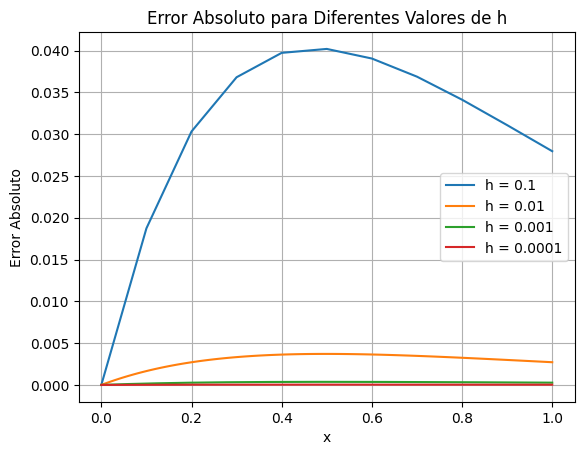

In [10]:
# Ejercicio 3: Cálculo del Error Absoluto
h = [0.1, 0.01, 0.001, 0.0001]
for h in h:
    x, y_approximada = euler(f, x0, y0, h, xf)
    y_exacta = solucion(x)
    Error_abs = np.abs(y_exacta - y_approximada)

    plt.plot(x, Error_abs, label=f'h = {h}')

plt.title("Error Absoluto para Diferentes Valores de h")
plt.xlabel("x")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.show()